In [1]:
from scipy.io import arff # For lading the given dataset in python
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Loading Data and converting it into a Data Frame

In [2]:
data = arff.loadarff('EEG Eye State.arff')
# print(data)
df = pd.DataFrame(data[0])

## Exploratory Data Analysis

In [3]:
df.shape

(14980, 15)

In [4]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [5]:
df['eyeDetection'].replace(b'0',0,inplace=True)
df['eyeDetection'].replace(b'1',1,inplace=True)
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


<AxesSubplot:>

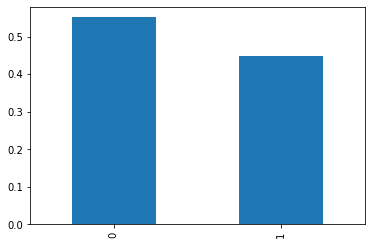

In [6]:
df['eyeDetection'].value_counts(normalize=True).plot.bar()

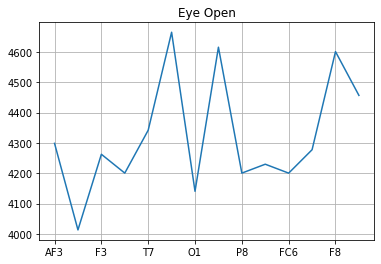

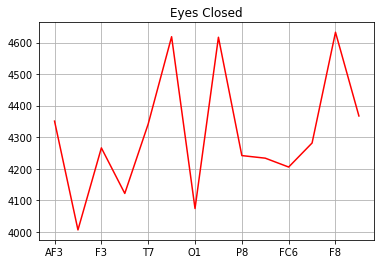

<Figure size 432x288 with 0 Axes>

In [7]:
df_main=df.drop('eyeDetection',axis=1)
df_class=df['eyeDetection']
eye_open_df = df_main.loc[df['eyeDetection'] == 0]
eye_closed_df = df_main.loc[df['eyeDetection'] == 1]
m=eye_open_df.describe()
a=m.iloc[1]
n=eye_closed_df.describe()
b=n.iloc[1]
a.plot(grid=True,title="Eye Open")
plt.show()
plt.savefig('desc1.jpg')
b.plot(grid=True,color='r',title="Eyes Closed")
plt.show()
plt.savefig('desc2.jpg')

## Model Building and training


In [8]:
x_train,x_test,y_train,y_test=train_test_split(df_main,df_class,test_size=0.25,random_state=5)

In [9]:
def modelfitting(name,xtr,xte,ytr,yte):
    if name=="Logistic Regression":
        model=LogisticRegression()
        model.fit(xtr,ytr)
    elif name=='SVM':
        model=SVC(C=1.5,kernel='poly',degree=5)
        model.fit(xtr,ytr)
    elif name=='Decision Tree':
        model=tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
        model.fit(xtr,ytr)
    elif name=='Random Forest':
        model=RandomForestClassifier(random_state=1)  
        model.fit(xtr,ytr)
    prediction=model.predict(xte)
    cnfmatrix = confusion_matrix(yte, prediction)
    print(cnfmatrix.trace(),"out of",len(xte),"are correctly predicted") # correct predictions
    percent_accuracy = (cnfmatrix.trace()/len(xte))*100
    percent_accuracy=round(percent_accuracy,2)
    precision=round((precision_score(yte, prediction)*100),2)
    recall=round((recall_score(yte, prediction)*100),2)
    f1=round((f1_score(yte, prediction)*100),2)
    return cnfmatrix,percent_accuracy,classification_report(yte, prediction),precision,recall,f1
        

In [10]:
lr=modelfitting('Logistic Regression',x_train,x_test,y_train,y_test)
percent_accuracy_lr=lr[1]
cnf_matrix_lr=lr[0]
report_lr=lr[2]
precision_lr=lr[3]
recall_lr=lr[4]
f1_lr=lr[5]
print(percent_accuracy_lr,"%")
print(report_lr)

2454 out of 3745 are correctly predicted
65.53 %
              precision    recall  f1-score   support

           0       0.66      0.78      0.72      2078
           1       0.65      0.50      0.56      1667

    accuracy                           0.66      3745
   macro avg       0.65      0.64      0.64      3745
weighted avg       0.65      0.66      0.65      3745



In [11]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [18]:
svm=modelfitting('SVM',x_train,x_test,y_train,y_test)
percent_accuracy_svm=svm[1]
cnf_matrix_svm=svm[0]
report_svm=svm[2]
precision_svm=svm[3]
recall_svm=svm[4]
f1_svm=svm[5]
print(percent_accuracy_svm,"%")
print(report_svm)

2592 out of 3745 are correctly predicted
69.21 %
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      2078
           1       0.70      0.53      0.61      1667

    accuracy                           0.69      3745
   macro avg       0.70      0.68      0.68      3745
weighted avg       0.69      0.69      0.68      3745



In [19]:
dt=modelfitting('Decision Tree',x_train,x_test,y_train,y_test)
percent_accuracy_dt=dt[1]
cnf_matrix_dt=dt[0]
report_dt=dt[2]
precision_dt=dt[3]
recall_dt=dt[4]
f1_dt=dt[5]
print(percent_accuracy_dt,"%")
print(report_dt)

3144 out of 3745 are correctly predicted
83.95 %
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2078
           1       0.82      0.82      0.82      1667

    accuracy                           0.84      3745
   macro avg       0.84      0.84      0.84      3745
weighted avg       0.84      0.84      0.84      3745



In [20]:
rf=modelfitting('Random Forest',x_train,x_test,y_train,y_test)
percent_accuracy_rf=rf[1]
cnf_matrix_rf=rf[0]
report_rf=rf[2]
precision_rf=rf[3]
recall_rf=rf[4]
f1_rf=rf[5]
print(percent_accuracy_rf,"%")
print(report_rf)

3466 out of 3745 are correctly predicted
92.55 %
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2078
           1       0.93      0.90      0.91      1667

    accuracy                           0.93      3745
   macro avg       0.93      0.92      0.92      3745
weighted avg       0.93      0.93      0.93      3745



In [30]:
precisions=[precision_lr,precision_svm,precision_dt,precision_rf]
recalls=[recall_lr,recall_svm,recall_dt,recall_rf]
f1s=[f1_lr,f1_svm,f1_dt,f1_rf]
accuracies=[percent_accuracy_lr,percent_accuracy_svm,percent_accuracy_dt,percent_accuracy_rf]
models=['Logistic Regression','Support Vector Machine','Decision Tree','Random Forest']
comp=pd.DataFrame({'Models':models,"Accuracies":accuracies,"Precision":precisions,"Recall": recalls,"F1":f1s})

In [31]:
comp
# non_models=comp.drop('Models',axis=1)

,Models,Accuracies,Precision,Recall,F1
0,Logistic Regression,65.53,64.66,49.73,56.22
1,Support Vector Machine,69.21,70.49,53.03,60.53
2,Decision Tree,83.95,81.84,82.18,82.01
3,Random Forest,92.55,93.00,90.04,91.50


<AxesSubplot:>

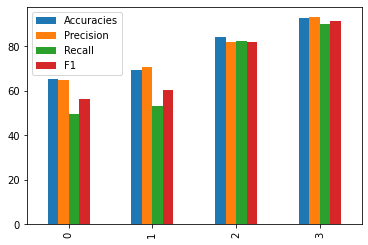

In [33]:
comp.plot(kind='bar')